In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px

warnings.filterwarnings('ignore')

In [2]:
data_1 = pd.read_csv('Dataset_part_PP2.csv', encoding="utf-8")
data_2 = pd.read_csv('DatasetSinRellenar.csv', encoding="utf-8")




print(data_1.info())
print(data_2.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       100 non-null    object
 1   Clean_Resume   100 non-null    object
 2   Common Skills  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       952 non-null    object
 1   Clean_Resume   952 non-null    object
 2   Common Skills  952 non-null    object
dtypes: object(3)
memory usage: 22.4+ KB
None


In [3]:
# Verifica si hay valores nulos en el dataset
nulos_en_dataset = data_1.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = data_1.isnull().sum()
print(nulos_por_columna)

False
Category         0
Clean_Resume     0
Common Skills    0
dtype: int64


In [4]:
print(data_2.shape)
print(data_2.columns)
print(data_2.Category.value_counts())


(952, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               140
Python Developer             140
Testing                      140
DevOps Engineer              110
Web Designing                 90
Blockchain                    80
Data Science                  80
Database                      66
DotNet Developer              56
Network Security Engineer     50
Name: count, dtype: int64


In [5]:

print(data_1.shape)
print(data_1.columns)
print(data_1.Category.value_counts())


(100, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Network Security Engineer    50
DotNet Developer             50
Name: count, dtype: int64


In [6]:
def join_dataset():

    rows_to_add = data_1.shape[0] - data_2.shape[0]

    additional_rows = pd.DataFrame(index=range(rows_to_add), columns=data_2.columns)

    df2_aligned = pd.concat([additional_rows, data_2], ignore_index=True)

    result = pd.concat([data_1, df2_aligned], axis=0)

    result.drop(result.columns[result.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
    
    return result



In [7]:

result = join_dataset()


# Verifica si hay valores nulos en el dataset
nulos_en_dataset = result.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = result.isnull().sum()
print(nulos_por_columna)

False
Category         0
Clean_Resume     0
Common Skills    0
dtype: int64


In [8]:
print(result.shape)
print(result.columns)
print(result.Category.value_counts())


(1052, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               140
Python Developer             140
Testing                      140
DevOps Engineer              110
DotNet Developer             106
Network Security Engineer    100
Web Designing                 90
Blockchain                    80
Data Science                  80
Database                      66
Name: count, dtype: int64


In [9]:
result['Category'] = result['Category'].str.strip()

In [10]:
result["Category"].unique()

array(['Network Security Engineer', 'DotNet Developer', 'Blockchain',
       'Data Science', 'Database', 'DevOps Engineer', 'Java Developer',
       'Python Developer', 'Testing', 'Web Designing'], dtype=object)

In [11]:
#reducir las etiquetas a 1200
def sample_n(df, n=140):
    return df.sample(min(len(df), n))

df = result.groupby('Category').apply(sample_n).reset_index(drop=True)

In [12]:
print(df.shape)
print(df.columns)
print(df.Category.value_counts())

(1052, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               140
Python Developer             140
Testing                      140
DevOps Engineer              110
DotNet Developer             106
Network Security Engineer    100
Web Designing                 90
Blockchain                    80
Data Science                  80
Database                      66
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

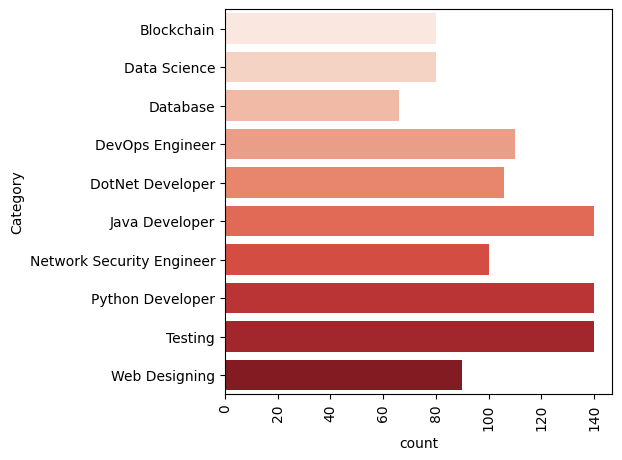

In [13]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [14]:
df.to_csv('DatasetRelleno.csv', index=False)


In [4]:
import pandas as pd
import random

# Expansión de los detalles para cada categoría con frases adicionales
detalles = {
    "Network Security Engineer": {
        "phrases": [
            "with a deep understanding of {specialty}, holding certifications such as {certification}.",
            "recognized for expertise in {specialty} and achieving {certification}, with a strong focus on protecting networks.",
            "who has led projects on {specialty}, certified in {certification}, ensuring robust security measures."
        ],
        "specialties": ['cloud security', 'endpoint protection', 'network defense', 'data encryption', 'identity and access management', 'secure network architectures'],
        "certifications": ['CompTIA Security+', 'Certified Ethical Hacker (CEH)', 'Cisco CCNA Security', 'Certified Information Systems Security Professional (CISSP)', 'GIAC Security Essentials (GSEC)'],
        "skills": ["Firewall Management", "Intrusion Detection", "Security Protocols", "Risk Management", "Vulnerability Assessment", "Network Policies"]
    },
    "DotNet Developer": {
        "phrases": [
            "skilled in developing scalable solutions using {specialty}, with {certification}.",
            "experienced in {specialty}, and holding a {certification}, with a strong passion for coding and software development.",
            "who excels in {specialty}, certified as a {certification}, and is known for writing clean, maintainable code."
        ],
        "specialties": ['web applications', 'RESTful APIs', 'microservices', 'cloud-native development', 'ASP.NET MVC', 'entity framework'],
        "certifications": ['Microsoft Certified: Azure Developer Associate', 'Microsoft Certified Solutions Developer (MCSD)', 'ScrumMaster Certified', 'Microsoft Certified: .NET Core Developer'],
        "skills": ["C#", ".NET Core", "ASP.NET", "Entity Framework", "Azure", "DevOps"]
    },

    "Web Designing": {
        "phrases": [
            "with a creative flair for {specialty}, validated by {certification}.",
            "who specializes in {specialty}, complemented by a certification in {certification}, with a strong emphasis on user experience.",
            "focused on {specialty}, with {certification}, known for crafting engaging and intuitive web experiences."
        ],
        "specialties": ['responsive design', 'UX/UI design', 'graphic design', 'web animation', 'SEO optimization', 'content management systems'],
        "certifications": ['Adobe Certified Expert (ACE)', 'Certified Web Designer', 'Google UX Design Professional Certificate', 'Web Design for Everybody (Coursera)'],
        "skills": ["HTML5", "CSS3", "JavaScript", "Adobe Creative Suite", "Sketch", "Figma"]
    },

    "Database": {
        "phrases": [
            "expert in managing and optimizing {specialty}, certified in {certification}.",
            "with profound knowledge in {specialty}, holding a {certification}, focused on database efficiency and security.",
            "specializing in {specialty} with a strong background in {certification}, adept at database design and performance tuning."
        ],
        "specialties": ['database administration', 'data warehousing', 'data modeling', 'SQL database development', 'NoSQL databases', 'database security'],
        "certifications": ['Oracle Database Certified Professional', 'Microsoft Certified: SQL Server Database Administrator', 'IBM Certified Database Administrator', 'MongoDB Certified DBA'],
        "skills": ["SQL", "NoSQL", "Database Design", "Data Analysis", "Performance Tuning", "Security Best Practices"]
    },

    "Blockchain": {
        "phrases": [
            "innovator in {specialty}, with certifications including {certification}, focusing on the development of secure and decentralized solutions.",
            "with extensive experience in {specialty} and a {certification}, passionate about cryptocurrency and smart contract development.",
            "who excels in {specialty}, certified as {certification}, with a strong emphasis on blockchain technology's potential for innovation."
        ],
        "specialties": ['smart contract development', 'cryptocurrency technology', 'blockchain network architecture', 'decentralized applications (DApps)', 'blockchain security', 'Ethereum platform'],
        "certifications": ['Certified Blockchain Developer', 'Blockchain Council Certified Blockchain Expert', 'Ethereum Blockchain Developer Certification'],
        "skills": ["Solidity", "Smart Contracts", "Blockchain Technology", "Cryptography", "Ethereum", "DApp Development"]
    },

     "Data Science": {
        "phrases": [
            "data scientist skilled in {specialty} with a strong foundation in {certification}, dedicated to extracting actionable insights from large datasets.",
            "with a deep interest in {specialty} and holding a {certification}, adept at using data to solve complex problems and drive decision making.",
            "who specializes in {specialty}, certified with {certification}, and is passionate about leveraging analytics for strategic advantage."
        ],
        "specialties": ['predictive modeling', 'machine learning', 'statistical analysis', 'data visualization', 'big data technologies', 'natural language processing'],
        "certifications": ['Certified Analytics Professional', 'Data Science Council of America Certification', 'Google Data Analytics Professional Certificate', 'IBM Data Science Professional Certificate'],
        "skills": ["Python", "R", "SQL", "Machine Learning", "Data Visualization", "Statistical Analysis"]
    },
}

categorias = list(detalles.keys())

data = {"Category": [], "Resume": [], "Common Skills": []}

for categoria in categorias:
    for _ in range(50):  # Por cada categoría genera 100 entradas
        specialty = random.choice(detalles[categoria]["specialties"])
        certification = random.choice(detalles[categoria]["certifications"])
        skills = ", ".join(random.sample(detalles[categoria]["skills"], 3))
        phrase = random.choice(detalles[categoria]["phrases"]).format(specialty=specialty, certification=certification)
        
        resume_text = f"{categoria} {phrase} Known for strong problem-solving skills and ability to deliver under pressure. Proficient in {skills}."
        
        data["Category"].append(categoria)
        data["Resume"].append(resume_text)
        data["Common Skills"].append(skills)

df = pd.DataFrame(data)
csv_file_path = "highly_varied_job_positions_dataset.csv"
df.to_csv(csv_file_path, index=False)
